# Coronavirus World Update

- Import all the tools and data needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline
df_corona = pd.read_csv('time_series_covid19_confirmed_global.csv')

- Screening the data that you will analyze

In [2]:
df_corona.shape

(241, 67)

In [3]:
df_corona.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [4]:
df_corona.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
240,NaN,Libya,26.335100,17.228331,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


- Drop all the columns that you dont need

In [5]:
df_corona.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_corona.head(2)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,Albania,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123


In [6]:
df_corona.rename(columns={'Country/Region': 'Country'}, inplace=True)
df_corona.head(2)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,Albania,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123


- Set the 'Country' column as index for easier analysis

In [7]:
df_corona.set_index('Country', inplace=True)
df_corona.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
Albania,0,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123


In [8]:
dates = df_corona.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20'],
      dtype='object')

- Sum all the countries data to get the summary of all the corona virus cases in the world

In [9]:
df_corona.loc['Total'] = df_corona.sum(axis = 0)
df_corona.tail(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
Country,,,,,,,,,,,,,,,,,,,,,
Belize,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Laos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Libya,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Total,555,654,941,1434,2118,2927,5578,6166,8234,9927,...,167454,181573,197150,214909,242706,272164,304519,337089,378547,418678


In [10]:
total = df_corona.loc['Total', dates]
total.head(10)

1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
1/27/20    2927
1/28/20    5578
1/29/20    6166
1/30/20    8234
1/31/20    9927
Name: Total, dtype: int64

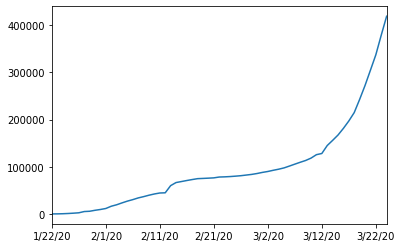

In [11]:
total.plot()

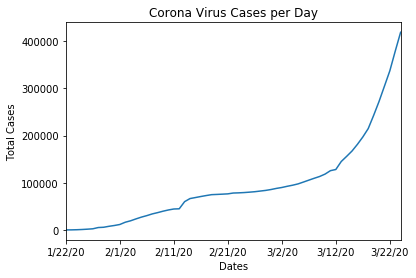

In [12]:
total.plot(kind='line')

plt.title('Corona Virus Cases per Day')
plt.ylabel('Total Cases')
plt.xlabel('Dates')

plt.show()

- By the graphics shown, we can see the virus is still spreading rapidly
- By the world summary we still haven't succeded in "flatten the curve"

In [43]:
df_corona.sort_values(by='3/24/20', ascending=False, axis=0, inplace=True)

In [58]:
df_corona.head(11)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
Country,,,,,,,,,,,,,,,,,,,,,
Total,555,654,941,1434,2118,2927,5578,6166,8234,9927,...,167454,181573,197150,214909,242706,272164,304519,337089,378547,418678
Italy,0,0,0,0,0,0,0,0,0,2,...,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176
China,444,444,549,761,1058,1423,3554,3554,4903,5806,...,67794,67798,67799,67800,67800,67800,67800,67800,67800,67801
US,1,1,2,2,5,5,5,5,5,7,...,3499,4632,6421,7783,13677,19100,25489,33276,43847,53740
Spain,0,0,0,0,0,0,0,0,0,0,...,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885
Germany,0,0,0,0,0,1,4,4,4,5,...,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986
Iran,0,0,0,0,0,0,0,0,0,0,...,13938,14991,16169,17361,18407,19644,20610,21638,23049,24811
France,0,0,2,3,3,3,4,5,5,5,...,4499,6633,7652,9043,10871,12612,14282,16018,19856,22304
Switzerland,0,0,0,0,0,0,0,0,0,0,...,2200,2200,2700,3028,4075,5294,6575,7474,8795,9877


In [59]:
df_top10 = df_corona.head(11)

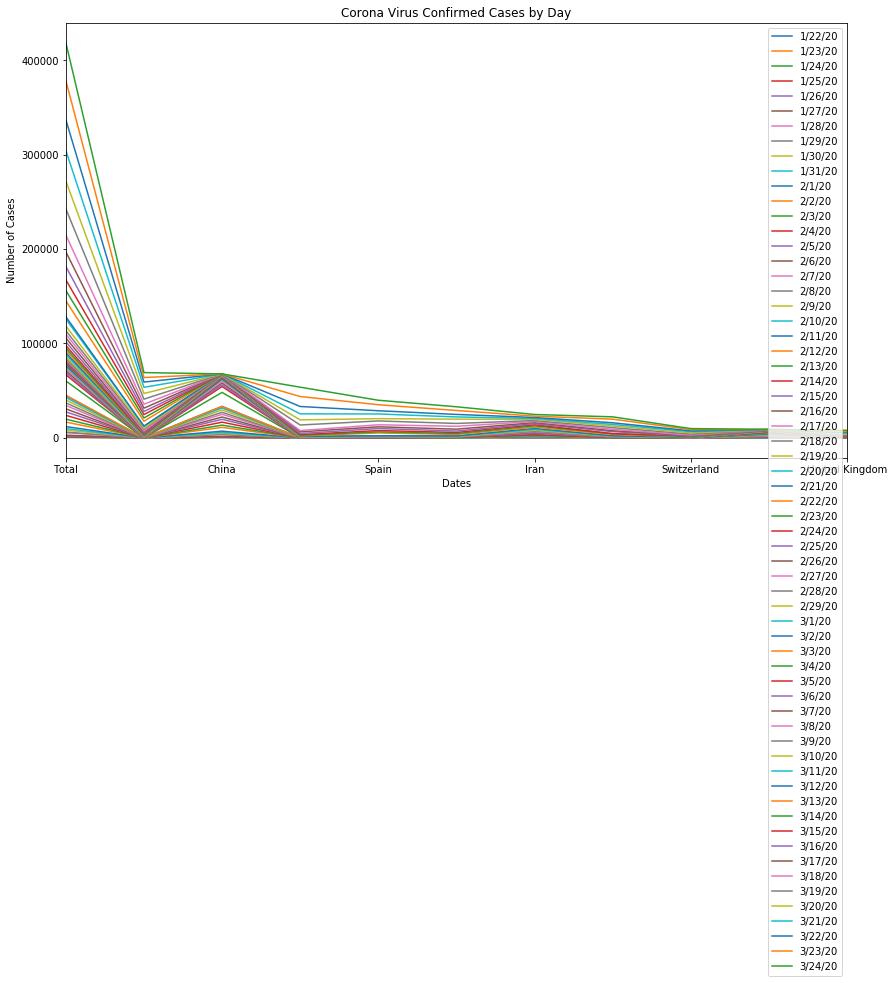

In [68]:
df_top10.plot(kind='line', figsize=(14, 8))

plt.title('Corona Virus Confirmed Cases by Day')
plt.ylabel('Number of Cases')
plt.xlabel('Dates')

plt.show()

In [61]:
df_top10_t = df_top10.transpose()
df_top10_t

Country,Total,Italy,China,US,Spain,Germany,Iran,France,Switzerland,"Korea, South",United Kingdom
1/22/20,555,0,444,1,0,0,0,0,0,1,0
1/23/20,654,0,444,1,0,0,0,0,0,1,0
1/24/20,941,0,549,2,0,0,0,2,0,2,0
1/25/20,1434,0,761,2,0,0,0,3,0,2,0
1/26/20,2118,0,1058,5,0,0,0,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
3/20/20,272164,47021,67800,19100,20410,19848,19644,12612,5294,8652,3983
3/21/20,304519,53578,67800,25489,25374,22213,20610,14282,6575,8799,5018
3/22/20,337089,59138,67800,33276,28768,24873,21638,16018,7474,8961,5683
3/23/20,378547,63927,67800,43847,35136,29056,23049,19856,8795,8961,6650


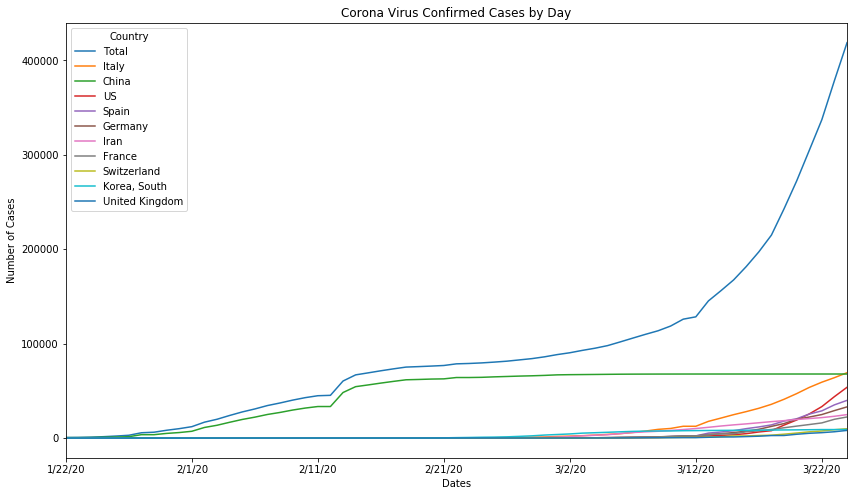

In [64]:
df_top10_t.plot(kind='line', figsize=(14, 8))

plt.title('Corona Virus Confirmed Cases by Day')
plt.ylabel('Number of Cases')
plt.xlabel('Dates')

plt.show()

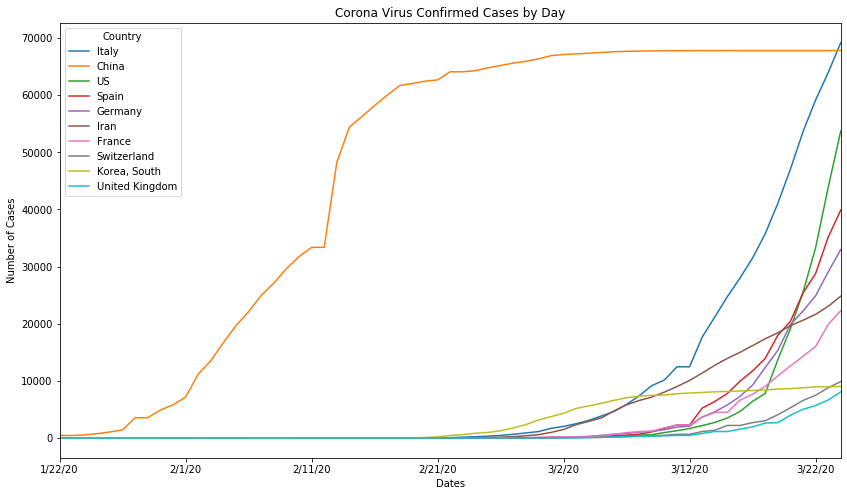

In [65]:
df_top10_t.drop(['Total'], axis=1, inplace=True)
df_top10_t.plot(kind='line', figsize=(14, 8))

plt.title('Corona Virus Confirmed Cases by Day')
plt.ylabel('Number of Cases')
plt.xlabel('Dates')

plt.show()

Top 10 Countries by confirmed cases
- China is starting to tone down the spread of the viruses in the country
- Italy is starting to be the center of epidemic in the world (slowly passing China)
- Almost all the other countries in the top 10 other than China haven't succesfully flatting the curve
- Except for South Korea (yellow line), they have starting to halt the spreading of the virus by the beginning of March, 
as we can see the "flatten curve" in their cases

# Predicting the next 10 days

- Setting the dates as array for python to study

In [13]:
days_since_outbreak = np.array([i for i in range(len(dates))]).reshape(-1, 1)
print(days_since_outbreak)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]]


In [14]:
days_since_outbreak.shape

(63, 1)

In [15]:
world_cases = df_corona.loc['Total']
print(world_cases)

1/22/20       555
1/23/20       654
1/24/20       941
1/25/20      1434
1/26/20      2118
            ...  
3/20/20    272164
3/21/20    304519
3/22/20    337089
3/23/20    378547
3/24/20    418678
Name: Total, Length: 63, dtype: int64


In [16]:
pred = np.array(world_cases).reshape(-1, 1)
print(pred)

[[   555]
 [   654]
 [   941]
 [  1434]
 [  2118]
 [  2927]
 [  5578]
 [  6166]
 [  8234]
 [  9927]
 [ 12038]
 [ 16787]
 [ 19881]
 [ 23892]
 [ 27635]
 [ 30794]
 [ 34391]
 [ 37120]
 [ 40150]
 [ 42762]
 [ 44802]
 [ 45221]
 [ 60368]
 [ 66885]
 [ 69030]
 [ 71224]
 [ 73258]
 [ 75136]
 [ 75639]
 [ 76197]
 [ 76819]
 [ 78572]
 [ 78958]
 [ 79561]
 [ 80406]
 [ 81388]
 [ 82746]
 [ 84112]
 [ 86011]
 [ 88369]
 [ 90306]
 [ 92840]
 [ 95120]
 [ 97882]
 [101794]
 [105831]
 [109805]
 [113571]
 [118602]
 [125875]
 [128353]
 [145209]
 [156104]
 [167454]
 [181573]
 [197150]
 [214909]
 [242706]
 [272164]
 [304519]
 [337089]
 [378547]
 [418678]]


In [17]:
X = days_since_outbreak
y = pred
print(X)
print(y)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]]
[[   555]
 [   654]
 [   941]
 [  1434]
 [  2118]
 [  2927]
 [  5578]
 [  6166]
 [  8234]
 [  9927]
 [ 12038]
 [ 16787]
 [ 19881]
 [ 23892]
 [ 27635]
 [ 30794]
 [ 34391]
 [ 37120]
 [ 40150]
 [ 42762]
 [ 44802]
 [ 45221]
 [ 60368]
 [ 66885]
 [ 69030]
 [ 71224]
 [ 73258]
 [ 75136]
 [ 75639]
 [ 76197]
 [ 76819]
 [ 78572]
 [ 78958]
 [ 79561]
 [ 80406]
 [ 81388]
 [ 82746]
 [ 84112]
 [ 86011]
 [ 88369]
 [ 90306]
 [ 92840]
 [ 95120]
 [ 97882]
 [101794]
 [105831]
 [109805]
 [113571]
 [118602]
 [125875]
 [128353]
 [145209]
 [156104]
 [167454]
 [181573]
 [197150]
 [214909]
 [242706]
 [272164]
 [304519]
 [337089]
 [378547]
 

In [18]:
X.shape

(63, 1)

In [19]:
y.shape

(63, 1)

In [20]:
model_lin = LinearRegression().fit(X, y)

In [21]:
r_sq = model_lin.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', model_lin.intercept_) 
print('slope:', model_lin.coef_) 

coefficient of determination: 0.7528827592539137
intercept: [-40273.83878968]
slope: [[4368.67324309]]


In [22]:
new_model_lin = LinearRegression().fit(X, y.reshape((-1, 1)))
print('intercept:' , new_model_lin.intercept_)
print('slope:', new_model_lin.coef_)

intercept: [-40273.83878968]
slope: [[4368.67324309]]


In [24]:
y_lin_pred = new_model_lin.predict(X)
print('predicted response:', y_lin_pred, sep='\n')

predicted response:
[[-40273.83878968]
 [-35905.16554659]
 [-31536.49230351]
 [-27167.81906042]
 [-22799.14581733]
 [-18430.47257424]
 [-14061.79933116]
 [ -9693.12608807]
 [ -5324.45284498]
 [  -955.77960189]
 [  3412.89364119]
 [  7781.56688428]
 [ 12150.24012737]
 [ 16518.91337046]
 [ 20887.58661354]
 [ 25256.25985663]
 [ 29624.93309972]
 [ 33993.60634281]
 [ 38362.27958589]
 [ 42730.95282898]
 [ 47099.62607207]
 [ 51468.29931516]
 [ 55836.97255824]
 [ 60205.64580133]
 [ 64574.31904442]
 [ 68942.99228751]
 [ 73311.66553059]
 [ 77680.33877368]
 [ 82049.01201677]
 [ 86417.68525986]
 [ 90786.35850294]
 [ 95155.03174603]
 [ 99523.70498912]
 [103892.37823221]
 [108261.05147529]
 [112629.72471838]
 [116998.39796147]
 [121367.07120456]
 [125735.74444764]
 [130104.41769073]
 [134473.09093382]
 [138841.76417691]
 [143210.43741999]
 [147579.11066308]
 [151947.78390617]
 [156316.45714926]
 [160685.13039235]
 [165053.80363543]
 [169422.47687852]
 [173791.15012161]
 [178159.8233647 ]
 [182528.49

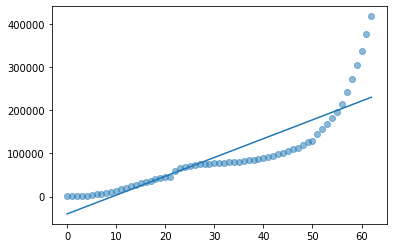

In [25]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_lin_pred)

In [26]:
# Try to predict the next 10 days
x_new = np.array([63, 64, 65, 66, 67, 68, 69, 70, 71, 72]).reshape((-1, 1))
print(x_new)
y_new = model_lin.predict(x_new)
print(y_new)

[[63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]]
[[234952.57552483]
 [239321.24876792]
 [243689.92201101]
 [248058.5952541 ]
 [252427.26849718]
 [256795.94174027]
 [261164.61498336]
 [265533.28822645]
 [269901.96146953]
 [274270.63471262]]


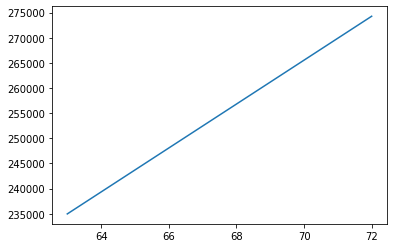

In [27]:
plt.plot(x_new, y_new)

## Using Polynomial Regression

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

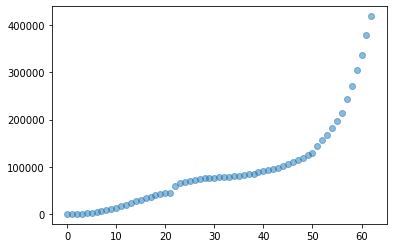

In [29]:
plt.scatter(X, y, alpha=0.5)

In [30]:
transformer = PolynomialFeatures(degree=5, include_bias=False)

In [31]:
transformer.fit(X)

PolynomialFeatures(degree=5, include_bias=False, interaction_only=False,
                   order='C')

In [32]:
X_ = transformer.transform(X)

In [33]:
print(X_)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [2.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01
  3.20000000e+01]
 [3.00000000e+00 9.00000000e+00 2.70000000e+01 8.10000000e+01
  2.43000000e+02]
 [4.00000000e+00 1.60000000e+01 6.40000000e+01 2.56000000e+02
  1.02400000e+03]
 [5.00000000e+00 2.50000000e+01 1.25000000e+02 6.25000000e+02
  3.12500000e+03]
 [6.00000000e+00 3.60000000e+01 2.16000000e+02 1.29600000e+03
  7.77600000e+03]
 [7.00000000e+00 4.90000000e+01 3.43000000e+02 2.40100000e+03
  1.68070000e+04]
 [8.00000000e+00 6.40000000e+01 5.12000000e+02 4.09600000e+03
  3.27680000e+04]
 [9.00000000e+00 8.10000000e+01 7.29000000e+02 6.56100000e+03
  5.90490000e+04]
 [1.00000000e+01 1.00000000e+02 1.00000000e+03 1.00000000e+04
  1.00000000e+05]
 [1.10000000e+01 1.21000000e+02 1.33100000e+03 1.46410000e+04
  1.61051000e+05]
 [1.20000000e+01 1.44000000e+02 1.728000

In [34]:
model_poly = LinearRegression().fit(X_, y)

In [35]:
r_sq = model_poly.score(X_, y)
print('coefficient of determintaion:', r_sq)

coefficient of determintaion: 0.9989932964347258


In [36]:
transformer.fit(x_new)

PolynomialFeatures(degree=5, include_bias=False, interaction_only=False,
                   order='C')

In [37]:
X_new = transformer.transform(x_new)
print(X_new)

[[6.30000000e+01 3.96900000e+03 2.50047000e+05 1.57529610e+07
  9.92436543e+08]
 [6.40000000e+01 4.09600000e+03 2.62144000e+05 1.67772160e+07
  1.07374182e+09]
 [6.50000000e+01 4.22500000e+03 2.74625000e+05 1.78506250e+07
  1.16029062e+09]
 [6.60000000e+01 4.35600000e+03 2.87496000e+05 1.89747360e+07
  1.25233258e+09]
 [6.70000000e+01 4.48900000e+03 3.00763000e+05 2.01511210e+07
  1.35012511e+09]
 [6.80000000e+01 4.62400000e+03 3.14432000e+05 2.13813760e+07
  1.45393357e+09]
 [6.90000000e+01 4.76100000e+03 3.28509000e+05 2.26671210e+07
  1.56403135e+09]
 [7.00000000e+01 4.90000000e+03 3.43000000e+05 2.40100000e+07
  1.68070000e+09]
 [7.10000000e+01 5.04100000e+03 3.57911000e+05 2.54116810e+07
  1.80422935e+09]
 [7.20000000e+01 5.18400000e+03 3.73248000e+05 2.68738560e+07
  1.93491763e+09]]


In [38]:
# Predicting the next 10 days
y_poly_new = model_poly.predict(X_new)
print(y_poly_new) # As of 25th of March, total = 467594 (from WHO)

[[ 465606.50445384]
 [ 518346.81758679]
 [ 576667.94008119]
 [ 640979.0952852 ]
 [ 711707.42509615]
 [ 789298.34535689]
 [ 874215.90125205]
 [ 966943.12270437]
 [1067982.37977099]
 [1177855.73803974]]


As we can see by the model predicton in the next 10 days, there will be significance amount of addition in confirm cases.
The model predicted there will be 465606 cases in the world in the 25th of March and by confirming with WHO data now there are
467594 total confirm cases (which is relatively close)
So the virus will continue to spread in the world if we continue our action as of now

So please stay safe and stay home !

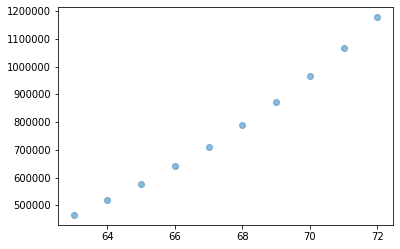

In [39]:
plt.scatter(x_new, y_poly_new, alpha=0.5)

In [40]:
import numpy as np
from sklearn.svm import SVC

In [41]:
model_svm = SVC().fit(X, y)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
y_svm_new = model_svm.predict(x_new)
print(y_svm_new)

[418678 418678 418678 418678 418678 418678 418678 418678 418678 418678]
